# Project 1 - Real Estate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Import and Preparation:

## 1. Import Dataset

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [4]:
test_df.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [5]:
len(train_df)

27321

In [6]:
len(test_df)

11709

In [7]:
train_df.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
0  267822      NaN       140        53       36     New York       NY   
1  246444      NaN       140       141       18      Indiana       IN   
2  245683      NaN       140        63       18      Indiana       IN   
3  279653      NaN       140       127       72  Puerto Rico       PR   
4  247218      NaN       140       161       20       Kansas       KS   

         city           place   type  ... female_age_mean  female_age_median  \
0    Hamilton        Hamilton   City  ...        44.48629           45.33333   
1  South Bend        Roseland   City  ...        36.48391           37.58333   
2    Danville        Danville   City  ...        42.15810           42.83333   
3    San Juan        Guaynabo  Urban  ...        47.77526           50.58333   
4   Manhattan  Manhattan City   City  ...        24.17693           21.58333   

   female_age_stdev  female_age_sample_weight  female_age_samples  pct_own  \
0          22.51276                 685.33845              2618.0  0.79046   
1          23.43353                 267.23367              1284.0  0.52483   
2          23.94119                 707.01963              3238.0  0.85331   
3          24.32015                 362.20193              1559.0  0.65037   
4          11.10484                1854.48652              3051.0  0.13046   

   married  married_snp  separated  divorced  
0  0.57851      0.01882    0.01240   0.08770  
1  0.34886      0.01426    0.01426   0.09030  
2  0.64745      0.02830    0.01607   0.10657  
3  0.47257      0.02021    0.02021   0.10106  
4  0.12356      0.00000    0.00000   0.03109  

[5 rows x 80 columns]

In [8]:
test_df.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0  255504      NaN       140       163       26      Michigan       MI   
1  252676      NaN       140         1       23         Maine       ME   
2  276314      NaN       140        15       42  Pennsylvania       PA   
3  248614      NaN       140       231       21      Kentucky       KY   
4  286865      NaN       140       355       48         Texas       TX   

             city                  place     type  ... female_age_mean  \
0         Detroit  Dearborn Heights City      CDP  ...        34.78682   
1          Auburn            Auburn City     City  ...        44.23451   
2       Pine City              Millerton  Borough  ...        41.62426   
3      Monticello        Monticello City     City  ...        44.81200   
4  Corpus Christi                  Edroy     Town  ...        40.66618   

   female_age_median  female_age_stdev  female_age_sample_weight  \
0           33.75000          21.58531                 416.48097   
1           46.66667          22.37036                 532.03505   
2           44.50000          22.86213                 453.11959   
3           48.00000          21.03155                 263.94320   
4           42.66667          21.30900                 709.90829   

   female_age_samples  pct_own  married  married_snp  separated  divorced  
0              1938.0  0.70252  0.28217      0.05910    0.03813   0.14299  
1              1950.0  0.85128  0.64221      0.02338    0.00000   0.13377  
2              1879.0  0.81897  0.59961      0.01746    0.01358   0.10026  
3              1081.0  0.84609  0.56953      0.05492    0.04694   0.12489  
4              2956.0  0.79077  0.57620      0.01726    0.00588   0.16379  

[5 rows x 80 columns]

## 2. Figure out the primary key and look for the requirement of indexing.

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

In [11]:
train_df.describe()

UID  BLOCKID  SUMLEVEL      COUNTYID       STATEID  \
count   27321.000000      0.0   27321.0  27321.000000  27321.000000   
mean   257331.996303      NaN     140.0     85.646426     28.271806   
std     21343.859725      NaN       0.0     98.333097     16.392846   
min    220342.000000      NaN     140.0      1.000000      1.000000   
25%    238816.000000      NaN     140.0     29.000000     13.000000   
50%    257220.000000      NaN     140.0     63.000000     28.000000   
75%    275818.000000      NaN     140.0    109.000000     42.000000   
max    294334.000000      NaN     140.0    840.000000     72.000000   

           zip_code     area_code           lat           lng         ALand  \
count  27321.000000  27321.000000  27321.000000  27321.000000  2.732100e+04   
mean   50081.999524    596.507668     37.508813    -91.288394  1.295106e+08   
std    29558.115660    232.497482      5.588268     16.343816  1.275531e+09   
min      602.000000    201.000000     17.929085   -165.453872  4.113400e+04   
25%    26554.000000    405.000000     33.899064    -97.816067  1.799408e+06   
50%    47715.000000    614.000000     38.755183    -86.554374  4.866940e+06   
75%    77093.000000    801.000000     41.380606    -79.782503  3.359820e+07   
max    99925.000000    989.000000     67.074017    -65.379332  1.039510e+11   

       ...  female_age_mean  female_age_median  female_age_stdev  \
count  ...     27115.000000       27115.000000      27115.000000   
mean   ...        40.319803          40.355099         22.178745   
std    ...         5.886317           8.039585          2.540257   
min    ...        16.008330          13.250000          0.556780   
25%    ...        36.892050          34.916670         21.312135   
50%    ...        40.373320          40.583330         22.514410   
75%    ...        43.567120          45.416670         23.575260   
max    ...        79.837390          82.250000         30.241270   

       female_age_sample_weight  female_age_samples       pct_own  \
count              27115.000000        27115.000000  27053.000000   
mean                 544.238432         2208.761903      0.640434   
std                  283.546896         1089.316999      0.226640   
min                    0.664700            2.000000      0.000000   
25%                  355.995825         1471.000000      0.502780   
50%                  503.643890         2066.000000      0.690840   
75%                  680.275055         2772.000000      0.817460   
max                 6197.995200        27250.000000      1.000000   

            married   married_snp     separated      divorced  
count  27130.000000  27130.000000  27130.000000  27130.000000  
mean       0.508300      0.047537      0.019089      0.100248  
std        0.136860      0.037640      0.020796      0.049055  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.425102      0.020810      0.004530      0.065800  
50%        0.526665      0.038840      0.013460      0.095205  
75%        0.605760      0.065100      0.027488      0.129000  
max        1.000000      0.714290      0.714290      1.000000  

[8 rows x 74 columns]

In [12]:
test_df.describe()

UID  BLOCKID  SUMLEVEL      COUNTYID       STATEID  \
count   11709.000000      0.0   11709.0  11709.000000  11709.000000   
mean   257525.004783      NaN     140.0     85.710650     28.489196   
std     21466.372658      NaN       0.0     99.304334     16.607262   
min    220336.000000      NaN     140.0      1.000000      1.000000   
25%    238819.000000      NaN     140.0     29.000000     13.000000   
50%    257651.000000      NaN     140.0     61.000000     28.000000   
75%    276300.000000      NaN     140.0    109.000000     42.000000   
max    294333.000000      NaN     140.0    810.000000     72.000000   

           zip_code     area_code           lat           lng         ALand  \
count  11709.000000  11709.000000  11709.000000  11709.000000  1.170900e+04   
mean   50123.418396    593.598514     37.405491    -91.340229  1.095500e+08   
std    29775.134038    232.074263      5.625904     16.407818  7.624940e+08   
min      601.000000    201.000000     17.965835   -166.770979  8.299000e+03   
25%    25570.000000    404.000000     33.919813    -97.816561  1.718660e+06   
50%    47362.000000    612.000000     38.618093    -86.643344  4.835000e+06   
75%    77406.000000    787.000000     41.232973    -79.697311  3.204540e+07   
max    99929.000000    989.000000     64.804269    -65.695344  5.520166e+10   

       ...  female_age_mean  female_age_median  female_age_stdev  \
count  ...     11613.000000       11613.000000      11613.000000   
mean   ...        40.111999          40.131864         22.148145   
std    ...         5.851192           7.972026          2.554907   
min    ...        15.360240          12.833330          0.737110   
25%    ...        36.729210          34.750000         21.270920   
50%    ...        40.196960          40.333330         22.472990   
75%    ...        43.496490          45.333330         23.549450   
max    ...        90.107940          90.166670         29.626680   

       female_age_sample_weight  female_age_samples       pct_own  \
count              11613.000000        11613.000000  11587.000000   
mean                 550.411243         2233.003186      0.634194   
std                  280.992521         1072.017063      0.232232   
min                    0.251910            3.000000      0.000000   
25%                  363.225840         1499.000000      0.492500   
50%                  509.103610         2099.000000      0.687640   
75%                  685.883910         2800.000000      0.815235   
max                 4145.557870        15466.000000      1.000000   

            married   married_snp     separated      divorced  
count  11625.000000  11625.000000  11625.000000  11625.000000  
mean       0.505632      0.047960      0.019346      0.099191  
std        0.139774      0.038693      0.021428      0.048525  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.422020      0.020890      0.004500      0.064590  
50%        0.525270      0.038680      0.013870      0.094350  
75%        0.605660      0.065340      0.027910      0.128400  
max        1.000000      0.714290      0.714290      0.362750  

[8 rows x 74 columns]

- UID is unique userID value in the train and test dataset.

## 3. Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

In [13]:
train_df.isnull().sum()

UID                0
BLOCKID        27321
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          268
married          191
married_snp      191
separated        191
divorced         191
Length: 80, dtype: int64

In [14]:
test_df.isnull().sum()

UID                0
BLOCKID        11709
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          122
married           84
married_snp       84
separated         84
divorced          84
Length: 80, dtype: int64

In [15]:
# Percentage of missing value in the train set
missing_list_train = train_df.isnull().sum()*100/len(train_df)

missing_values_train_df = pd.DataFrame(missing_list_train, columns=['Percentage of missing values'])

missing_values_train_df.sort_values(by=['Percentage of missing values'], inplace=True, ascending=False)

missing_values_train_df[missing_values_train_df['Percentage of missing values'] > 0][:10]

Percentage of missing values
BLOCKID                                      100.000000
hc_median                                      2.196113
hc_sample_weight                               2.196113
hc_samples                                     2.196113
hc_stdev                                       2.196113
hc_mean                                        2.196113
hc_mortgage_stdev                              2.097288
hc_mortgage_median                             2.097288
hc_mortgage_mean                               2.097288
hc_mortgage_sample_weight                      2.097288

- BLOCKID has 100% missing value, so it can be dropped from the train set.

In [16]:
# Percentage of missing value in the test set
missing_list_test = test_df.isnull().sum()*100/len(test_df)

missing_values_test_df = pd.DataFrame(missing_list_test, columns=['Percentage of missing values'])

missing_values_test_df.sort_values(by=['Percentage of missing values'], inplace=True, ascending=False)

missing_values_test_df[missing_values_test_df['Percentage of missing values'] > 0][:10]

Percentage of missing values
BLOCKID                                      100.000000
hc_sample_weight                               2.476727
hc_samples                                     2.476727
hc_stdev                                       2.476727
hc_median                                      2.476727
hc_mean                                        2.476727
hc_mortgage_median                             2.288838
hc_mortgage_samples                            2.288838
hc_mortgage_sample_weight                      2.288838
hc_mortgage_stdev                              2.288838

- BLOCKID has 100% missing value, so it can be dropped from the test set.

In [17]:
# Dropping BLOCKID and SUMLEVEL Because SUMLEVEL doest not have any predictive power and no variance
train_df.drop(columns=['BLOCKID', 'SUMLEVEL'], inplace= True)
test_df.drop(columns=['BLOCKID','SUMLEVEL'], inplace=True)

In [18]:
# Imputing missing values with mean 
missing_train_cols = []

for col in train_df.columns:
    if train_df[col].isna().sum() != 0:
        missing_train_cols.append(col)
        
print(missing_train_cols)        

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [19]:
# Imputing missing values with mean 
missing_test_cols = []

for col in test_df.columns:
    if test_df[col].isna().sum() != 0:
        missing_test_cols.append(col)
        
print(missing_test_cols) 

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [20]:
# In missing columns replace Nan with mean
for col in train_df.columns:
    if col in (missing_train_cols):
        train_df[col].replace(np.nan, train_df[col].mean(), inplace=True)

In [21]:
# In missing columns replace Nan with mean
for col in test_df.columns:
    if col in (missing_test_cols):
        test_df[col].replace(np.nan, test_df[col].mean(), inplace=True)

In [22]:
train_df.isna().sum().sum()

0

In [23]:
test_df.isna().sum().sum()

0

# Exploratory Data Analysis

## 4. Perform debt analysis. You may take the following steps:

- Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [24]:
!pip install pandasql

In [25]:
from pandasql import sqldf

In [26]:
q1 = "select place,pct_own,second_mortgage,lat,lng from train_df where pct_own > 0.10 and second_mortgage <0.5 order by second_mortgage DESC LIMIT 2500;"
pysqldf = lambda q: sqldf(q, globals())
train_df_location_mort_pct = pysqldf(q1)

In [27]:
train_df_location_mort_pct.head(10)

place  pct_own  second_mortgage        lat         lng
0         Worcester City  0.20247          0.43363  42.254262  -71.800347
1           Harbor Hills  0.15618          0.31818  40.751809  -73.853582
2            Glen Burnie  0.22380          0.30212  39.127273  -76.635265
3        Egypt Lake-leto  0.11618          0.28972  28.029063  -82.495395
4            Lincolnwood  0.14228          0.28899  41.967289  -87.652434
5           Chicago City  0.29468          0.27431  41.906640  -87.689580
6           Lansing City  1.00000          0.26667  42.714208  -84.519179
7         Milwaukee City  0.26531          0.26596  43.067063  -87.953378
8  Rancho Cucamonga City  0.16188          0.26154  34.093184 -117.531484
9         San Bruno City  0.17064          0.25948  37.656229 -122.417568

In [28]:
!pip install plotly==5.7.0

In [29]:
import plotly.express as px
import plotly.graph_objects as go

In [30]:
fig = go.Figure(data=go.Scattergeo(
    lat = train_df_location_mort_pct['lat'],
    lon = train_df_location_mort_pct['lng']),
    )

In [31]:
fig.update_layout(
    geo=dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='Top 2,500 locations with second mortgage is the highest and percent ownership is above 10 percent')
fig.show()

### - Use the following bad debt equation:

    - Bad Debt = P (Second Mortgage ∩ Home Equity Loan)
    
    - Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage

In [32]:
train_df['bad_debt'] = train_df['second_mortgage'] + train_df['home_equity'] - train_df['home_equity_second_mortgage']
train_df['good_debt'] = train_df['debt'] - train_df['bad_debt']

In [33]:
train_df.head()

UID  COUNTYID  STATEID        state state_ab        city  \
0  267822        53       36     New York       NY    Hamilton   
1  246444       141       18      Indiana       IN  South Bend   
2  245683        63       18      Indiana       IN    Danville   
3  279653       127       72  Puerto Rico       PR    San Juan   
4  247218       161       20       Kansas       KS   Manhattan   

            place   type primary  zip_code  ...  female_age_stdev  \
0        Hamilton   City   tract     13346  ...          22.51276   
1        Roseland   City   tract     46616  ...          23.43353   
2        Danville   City   tract     46122  ...          23.94119   
3        Guaynabo  Urban   tract       927  ...          24.32015   
4  Manhattan City   City   tract     66502  ...          11.10484   

   female_age_sample_weight  female_age_samples  pct_own  married  \
0                 685.33845              2618.0  0.79046  0.57851   
1                 267.23367              1284.0  0.52483  0.34886   
2                 707.01963              3238.0  0.85331  0.64745   
3                 362.20193              1559.0  0.65037  0.47257   
4                1854.48652              3051.0  0.13046  0.12356   

   married_snp  separated  divorced  bad_debt  good_debt  
0      0.01882    0.01240   0.08770   0.09408    0.43555  
1      0.01426    0.01426   0.09030   0.04274    0.56581  
2      0.02830    0.01607   0.10657   0.09512    0.63972  
3      0.02021    0.02021   0.10106   0.01086    0.51628  
4      0.00000    0.00000   0.03109   0.05426    0.46512  

[5 rows x 80 columns]

In [34]:
train_df_top = train_df.sort_values(by=['pct_own','second_mortgage'], ascending= False)
train_df_top

UID  COUNTYID  STATEID       state state_ab          city  \
8862   253669        65       26    Michigan       MI       Lansing   
22894  290205       660       51    Virginia       VA  Harrisonburg   
24259  263965        23       34  New Jersey       NJ    Old Bridge   
19761  263529        15       34  New Jersey       NJ  Turnersville   
3366   249006        51       22   Louisiana       LA      Metairie   
...       ...       ...      ...         ...      ...           ...   
26793  238874        51       13     Georgia       GA      Savannah   
26798  283861        85       48       Texas       TX    Richardson   
26875  255824       163       26    Michigan       MI       Detroit   
27072  266339         5       36    New York       NY         Bronx   
27175  235725        57       12     Florida       FL         Tampa   

                   place  type primary  zip_code  ...  female_age_stdev  \
8862        Lansing City   CDP   tract     48910  ...           2.42843   
22894  Harrisonburg City  Town   tract     22801  ...           3.56056   
24259         Old Bridge  City   tract      8857  ...          22.32833   
19761       Turnersville  City   tract      8012  ...          23.24363   
3366         Kenner City  City   tract     70003  ...          23.84889   
...                  ...   ...     ...       ...  ...               ...   
26793   Garden City City  City   tract     31401  ...           9.52306   
26798    Richardson City  Town   tract     75080  ...          17.40833   
26875   River Rouge City   CDP   tract     48216  ...          16.30666   
27072  Mount Vernon City  City   tract     10467  ...          15.19538   
27175       Pebble Creek  City   tract     33647  ...          14.65116   

       female_age_sample_weight  female_age_samples  pct_own  married  \
8862                    2.61017                14.0      1.0  1.00000   
22894                1568.27266              2917.0      1.0  0.01883   
24259                 693.81632              2624.0      1.0  0.69316   
19761                 453.61645              1983.0      1.0  0.68981   
3366                  437.14557              1742.0      1.0  0.68775   
...                         ...                 ...      ...      ...   
26793                 508.17148              1241.0      0.0  0.00937   
26798                 212.97182              1071.0      0.0  0.53919   
26875                   2.84525                 9.0      0.0  0.50830   
27072                  11.80065                34.0      0.0  0.00000   
27175                 144.78344               648.0      0.0  0.25806   

       married_snp  separated  divorced  bad_debt  good_debt  
8862      0.000000   0.000000  0.000000  0.266670    0.73333  
22894     0.002510   0.000000  0.000000  0.125000    0.62500  
24259     0.030740   0.005220  0.011600  0.141370    0.57103  
19761     0.007280   0.007280  0.025790  0.128050    0.59222  
3366      0.024820   0.000000  0.068860  0.083480    0.47700  
...            ...        ...       ...       ...        ...  
26793     0.000000   0.000000  0.000000  0.105099    0.52409  
26798     0.073630   0.009500  0.071260  0.105099    0.52409  
26875     0.047537   0.019089  0.100248  0.105099    0.52409  
27072     0.000000   0.000000  0.000000  0.105099    0.52409  
27175     0.107530   0.107530  0.099460  0.105099    0.52409  

[27321 rows x 80 columns]

### - Create pie charts  to show overall debt and bad debt

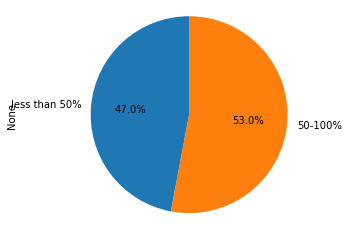

In [35]:
train_df['bins'] = pd.cut(train_df['bad_debt'],bins=[0,0.10,1], labels=["less than 50%","50-100%"])
train_df.groupby(['bins']).size().plot(kind='pie',subplots=True,startangle=90, autopct='%1.1f%%')
plt.axis('equal')

plt.show()

### City wise pie chart of good debt and bad debt

In [36]:
size = 10
explode = [0.4] * size
explode = tuple(explode)
explode

explode_bd = [0.5] * size*2
explode_bd = tuple(explode_bd)
explode_bd

labels_D = ['GD', 'BD'] * size
labels_D = tuple(labels_D)
labels_D

('GD',
 'BD',
 'GD',
 'BD',
 'GD',
 'BD',
 'GD',
 'BD',
 'GD',
 'BD',
 'GD',
 'BD',
 'GD',
 'BD',
 'GD',
 'BD',
 'GD',
 'BD',
 'GD',
 'BD')

In [37]:
l1 = list(train_df_top['bad_debt'] )
l1[:5]

[0.26667, 0.125, 0.14137, 0.12805, 0.08348]

In [38]:
l2 = list(train_df_top['good_debt'] )
l2[:5]

[0.73333, 0.625, 0.57103, 0.59222, 0.477]

In [39]:
l3 = sum(zip(l1, l2+[0]), ())

In [40]:
l3[:10]

(0.26667,
 0.73333,
 0.125,
 0.625,
 0.14137,
 0.57103,
 0.12805,
 0.59222,
 0.08348,
 0.477)

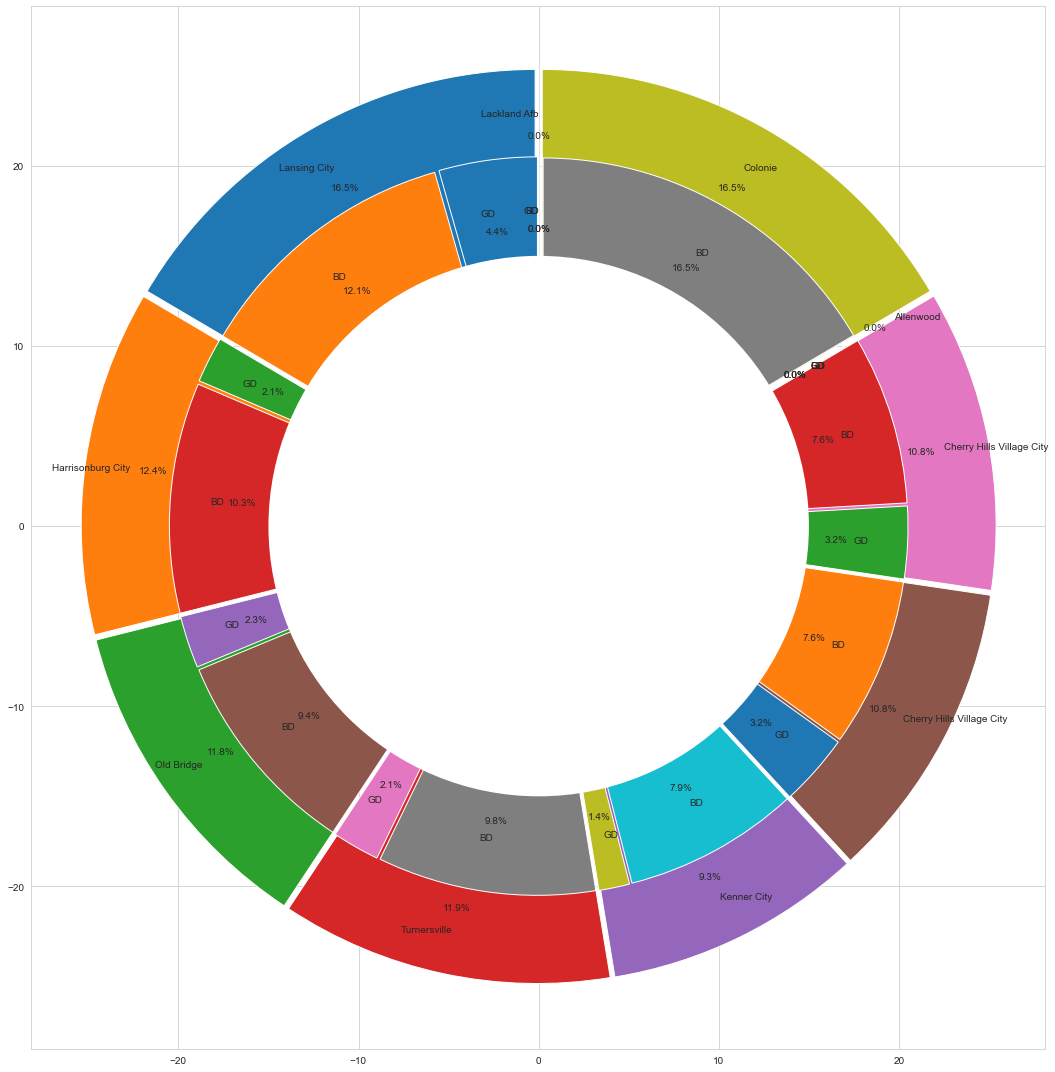

In [41]:
import seaborn as sns


labels = list(train_df_top.place[:10])
debt = list(train_df_top.debt[:10])

sns.set_style("whitegrid")

gd_bd = l3[:20]

plt.figure(figsize = (15, 15))

color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
#color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

plt.pie(debt, labels = labels, startangle = 90, frame = True, radius =25, autopct='%1.1f%%', pctdistance=0.85, labeldistance = 0.9, colors = color_pal, explode = explode)
plt.pie(gd_bd, labels = labels_D, startangle = 90, frame = True, radius = 20, autopct='%1.1f%%', pctdistance=0.80,  labeldistance = 0.85, colors = color_pal, explode = explode_bd)
centre_circle = plt.Circle((0,0),15,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()

### Since it is difficult to show all 2500 locations, without compromising readability, I have limited my selection to "Top 10" cities.

### - Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [42]:
train_df_top.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_

In [43]:
second_mortgage = list(train_df_top.second_mortgage)
home_equity = list(train_df_top.home_equity)

Good_Debt = list(train_df_top.good_debt)
Bad_Debt = list(train_df_top.bad_debt)

In [44]:
train_df_top['city'].value_counts()[:31].index

Index(['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Bronx', 'Las Vegas', 'Phoenix', 'Miami',
       'Dallas', 'Detroit', 'New York', 'Columbus', 'San Diego', 'Springfield',
       'Indianapolis', 'Milwaukee', 'Washington', 'Jacksonville', 'Pittsburgh',
       'San Francisco', 'Louisville', 'Rochester', 'Charlotte', 'Kansas City',
       'Portland', 'Cleveland', 'Atlanta', 'Cincinnati'],
      dtype='object')

In [45]:
cities = ['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Bronx', 'Las Vegas', 'Phoenix', 'Miami',
       'Dallas', 'Detroit', 'New York', 'Columbus', 'San Diego', 'Springfield',
       'Indianapolis', 'Milwaukee', 'Washington', 'Jacksonville', 'Pittsburgh',
       'San Francisco', 'Kansas City', 'Louisville', 'Rochester', 'Charlotte',
       'Portland', 'Cleveland', 'Atlanta', 'Cincinnati']

In [46]:
boxplot_df = train_df_top[train_df_top['city'].isin (cities)]

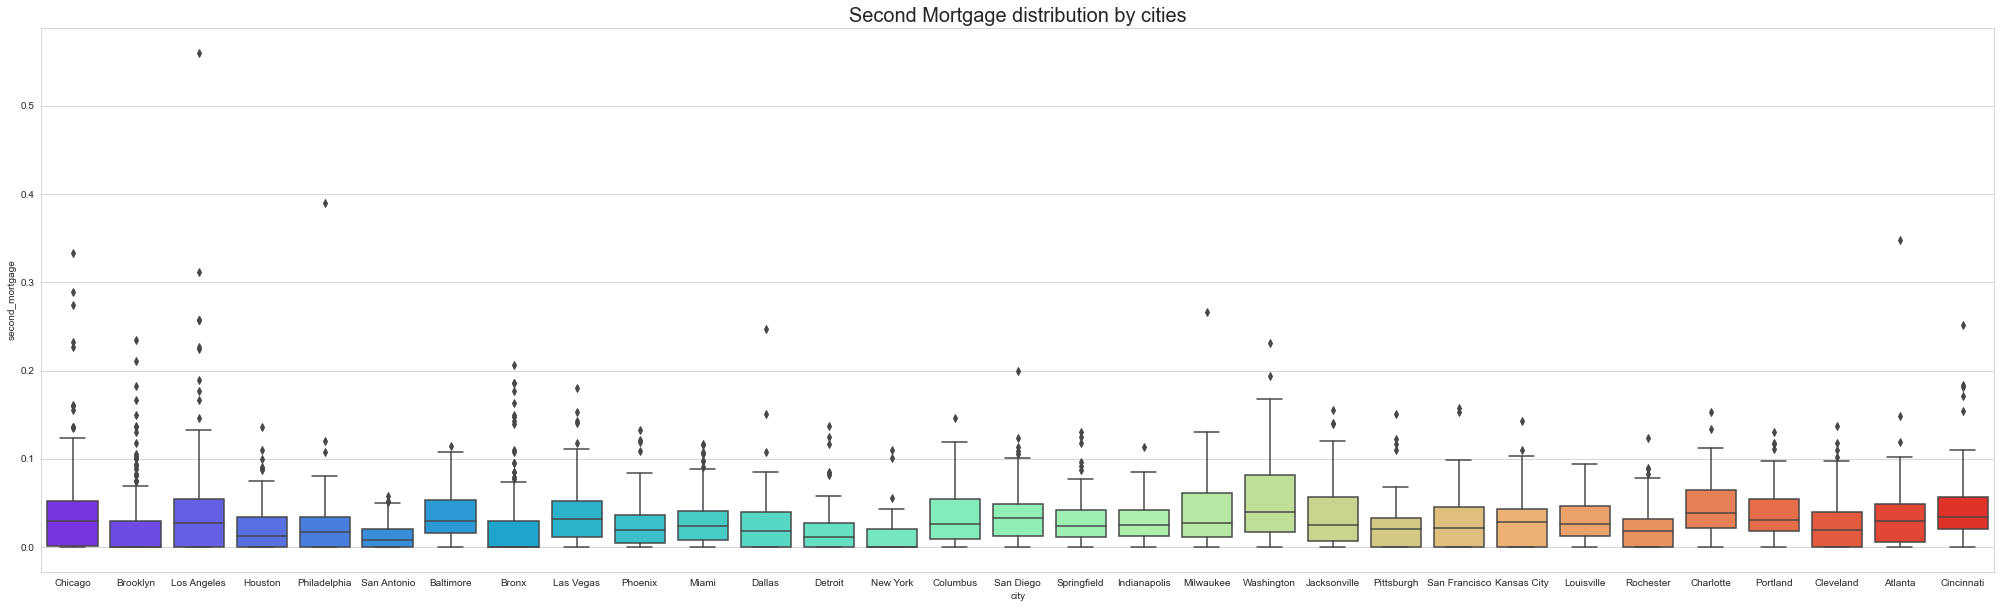

In [47]:
sns.set_style("whitegrid")

plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='second_mortgage',data=boxplot_df,palette='rainbow', order = ['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Bronx', 'Las Vegas', 'Phoenix', 'Miami',
       'Dallas', 'Detroit', 'New York', 'Columbus', 'San Diego', 'Springfield',
       'Indianapolis', 'Milwaukee', 'Washington', 'Jacksonville', 'Pittsburgh',
       'San Francisco', 'Kansas City', 'Louisville', 'Rochester', 'Charlotte',
       'Portland', 'Cleveland', 'Atlanta', 'Cincinnati']).set_title('Second Mortgage distribution by cities', fontsize = 20)
plt.show()

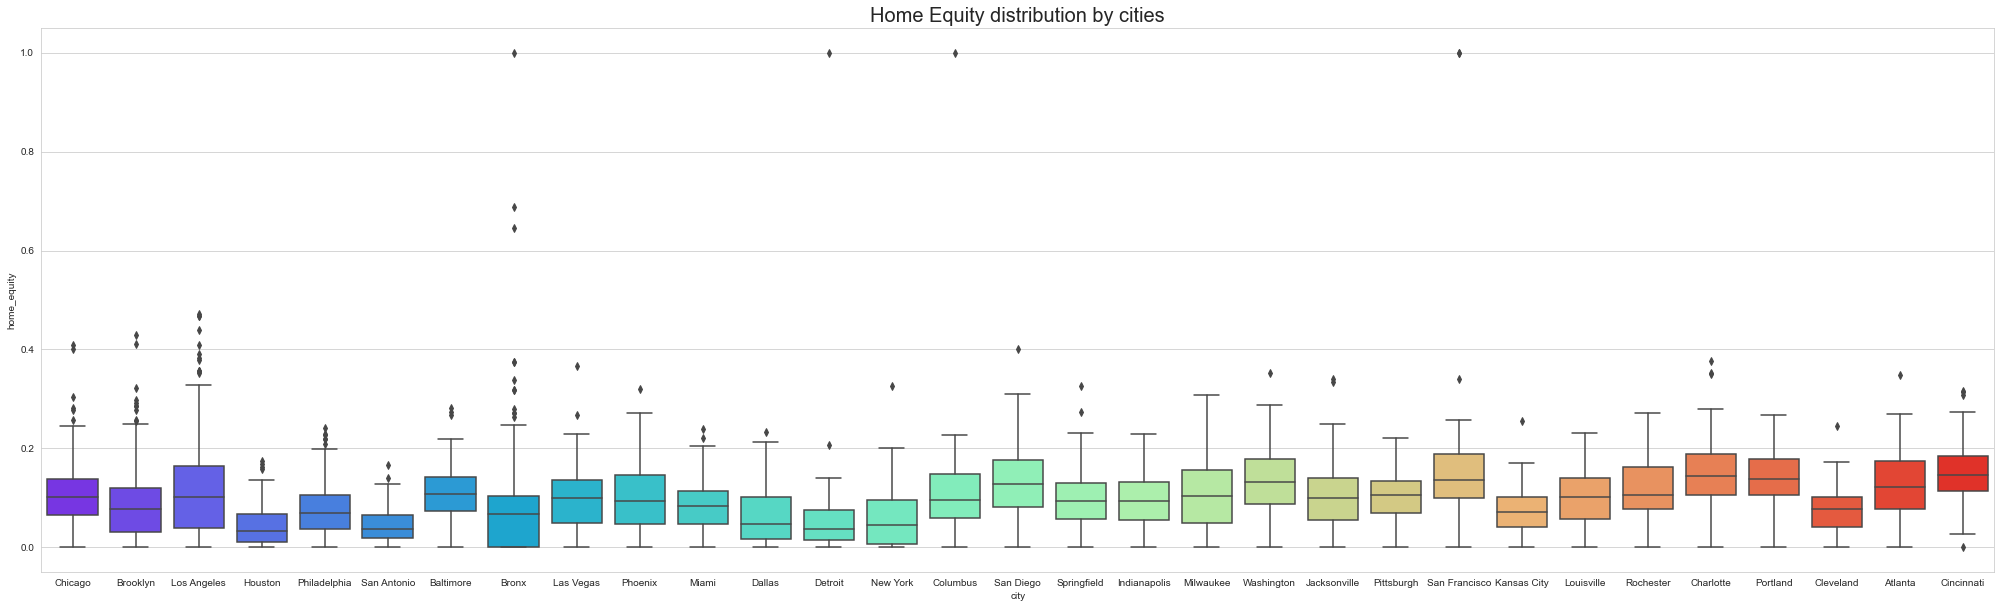

In [48]:
sns.set_style("whitegrid")

plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='home_equity',data=boxplot_df,palette='rainbow', order = ['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Bronx', 'Las Vegas', 'Phoenix', 'Miami',
       'Dallas', 'Detroit', 'New York', 'Columbus', 'San Diego', 'Springfield',
       'Indianapolis', 'Milwaukee', 'Washington', 'Jacksonville', 'Pittsburgh',
       'San Francisco', 'Kansas City', 'Louisville', 'Rochester', 'Charlotte',
       'Portland', 'Cleveland', 'Atlanta', 'Cincinnati']).set_title('Home Equity distribution by cities', fontsize = 20)
plt.show()

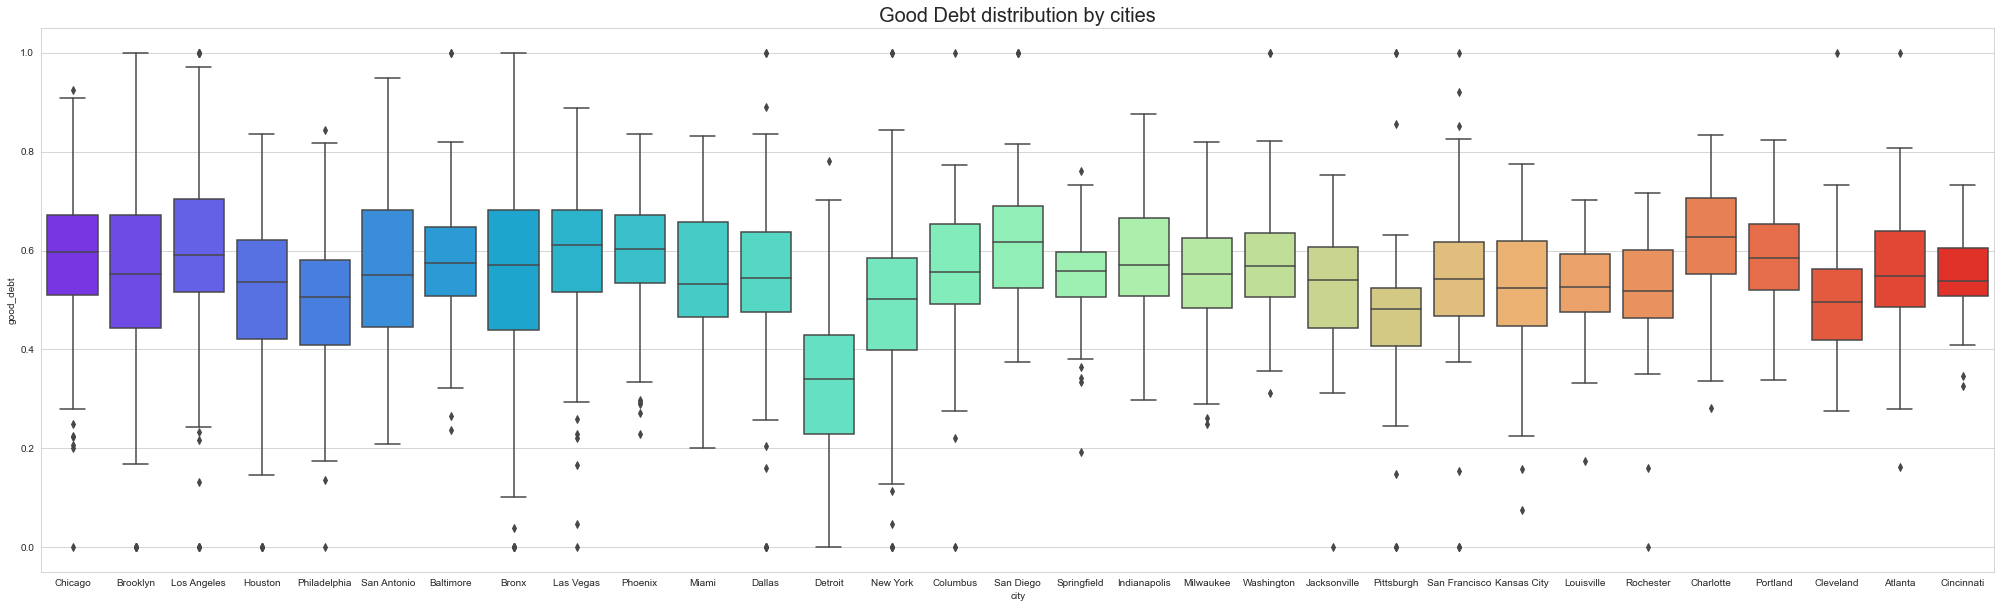

In [49]:
sns.set_style("whitegrid")

plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='good_debt',data=boxplot_df,palette='rainbow', order = ['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Bronx', 'Las Vegas', 'Phoenix', 'Miami',
       'Dallas', 'Detroit', 'New York', 'Columbus', 'San Diego', 'Springfield',
       'Indianapolis', 'Milwaukee', 'Washington', 'Jacksonville', 'Pittsburgh',
       'San Francisco', 'Kansas City', 'Louisville', 'Rochester', 'Charlotte',
       'Portland', 'Cleveland', 'Atlanta', 'Cincinnati']).set_title('Good Debt distribution by cities', fontsize = 20)
plt.show()

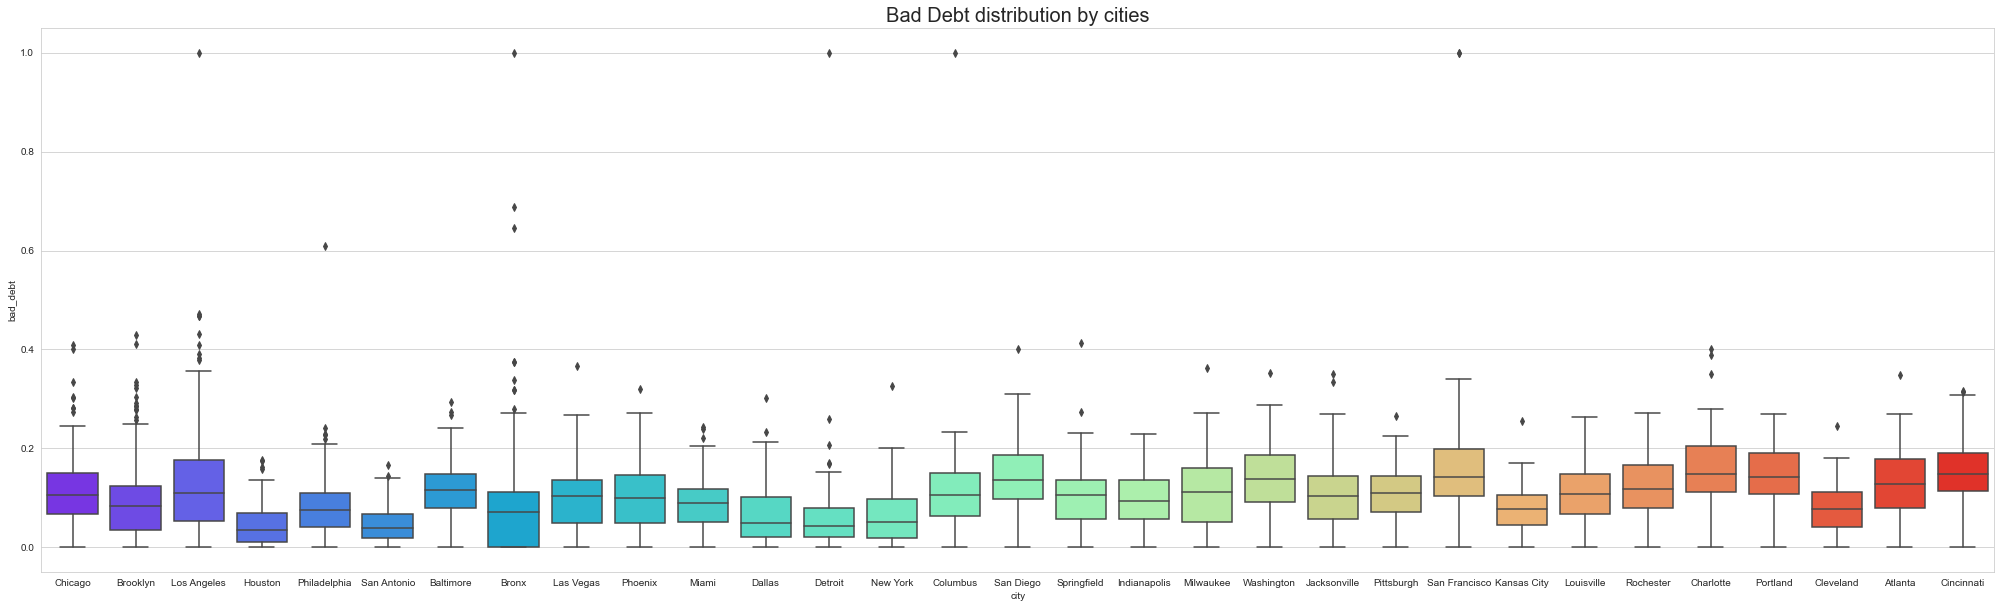

In [50]:
sns.set_style("whitegrid")

plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='bad_debt',data=boxplot_df,palette='rainbow', order = ['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Bronx', 'Las Vegas', 'Phoenix', 'Miami',
       'Dallas', 'Detroit', 'New York', 'Columbus', 'San Diego', 'Springfield',
       'Indianapolis', 'Milwaukee', 'Washington', 'Jacksonville', 'Pittsburgh',
       'San Francisco', 'Kansas City', 'Louisville', 'Rochester', 'Charlotte',
       'Portland', 'Cleveland', 'Atlanta', 'Cincinnati']).set_title('Bad Debt distribution by cities', fontsize = 20)
plt.show()

#### Since it is difficult to show all 2500 locations, without compromising readability, I have limited my selection to "Top 31" cities.

### - Create a collated income distribution chart for family income, house hold income, and remaining income

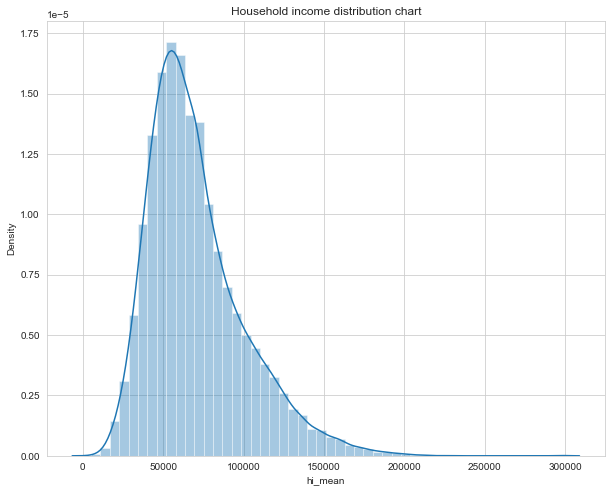

In [51]:
plt.figure(figsize=(10,8))
sns.distplot(train_df_top['hi_mean'])
plt.title('Household income distribution chart')
plt.show()

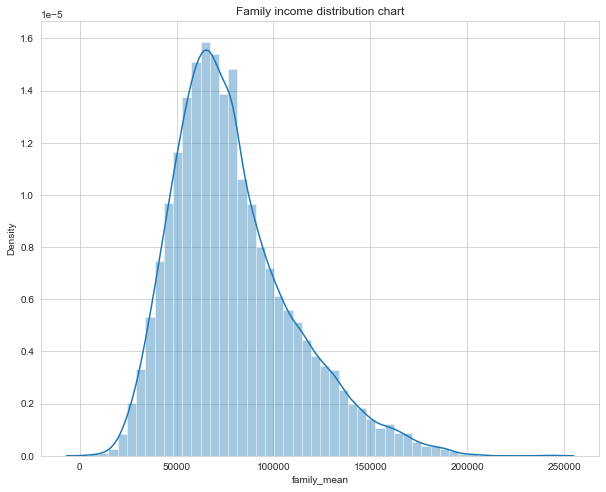

In [52]:
plt.figure(figsize=(10,8))
sns.distplot(train_df_top['family_mean'])
plt.title('Family income distribution chart')
plt.show()

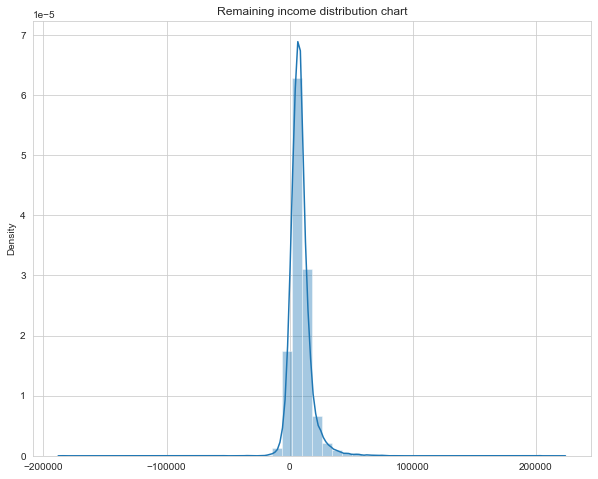

In [53]:
plt.figure(figsize=(10,8))
sns.distplot(train_df_top['family_mean']-train_df_top['hi_mean'])
plt.title('Remaining income distribution chart')
plt.show()

Income distribution almost has normality in its distrbution

## 5. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements): 


<Figure size 1080x864 with 0 Axes>

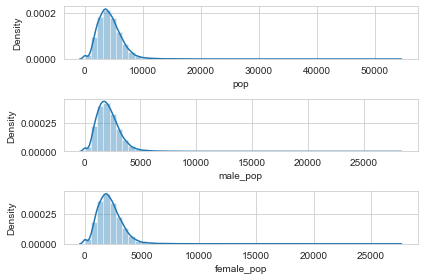

In [54]:
plt.figure(figsize=(15,12))
fig,(ax1,ax2,ax3) = plt.subplots(3,1)
sns.distplot(train_df_top['pop'],ax=ax1)
sns.distplot(train_df_top['male_pop'],ax=ax2)
sns.distplot(train_df_top['female_pop'],ax=ax3)
plt.subplots_adjust(wspace=0.8,hspace=0.8)
plt.tight_layout()
plt.show()

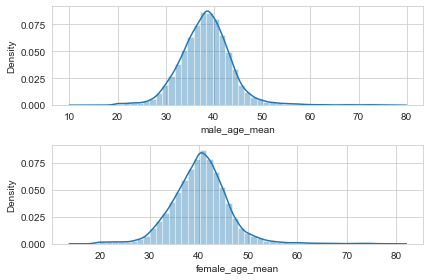

In [55]:
fig,(ax1,ax2)=plt.subplots(2,1)
sns.distplot(train_df_top['male_age_mean'],ax=ax1)
sns.distplot(train_df_top['female_age_mean'],ax=ax2)
plt.subplots_adjust(wspace=0.8,hspace=0.8)
plt.tight_layout()
plt.show()

### - Use pop and ALand variables to create a new field called population density

In [56]:
train_df['pop_density'] = train_df['pop'] / train_df['ALand']

In [57]:
test_df['pop_density'] = test_df['pop'] / test_df['ALand']

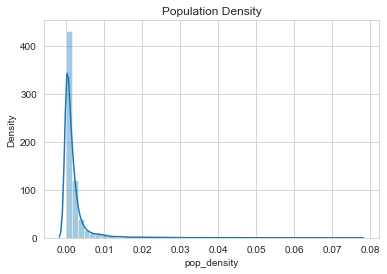

In [58]:
sns.distplot(train_df['pop_density'])
plt.title('Population Density')
plt.show() 
# Very less density is noticed

### - Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age

In [59]:
train_df['median_age'] = (train_df['male_age_median'] + train_df['female_age_median'])/2
test_df['median_age'] = (test_df['male_age_median']+ test_df['female_age_median'])/2

In [60]:
train_df[['male_age_median','female_age_median','male_pop','female_pop','median_age']].head()

male_age_median  female_age_median  male_pop  female_pop  median_age
0         44.00000           45.33333      2612        2618   44.666665
1         32.00000           37.58333      1349        1284   34.791665
2         40.83333           42.83333      3643        3238   41.833330
3         48.91667           50.58333      1141        1559   49.750000
4         22.41667           21.58333      2586        3051   22.000000

#### - Visualize the findings using appropriate chart type

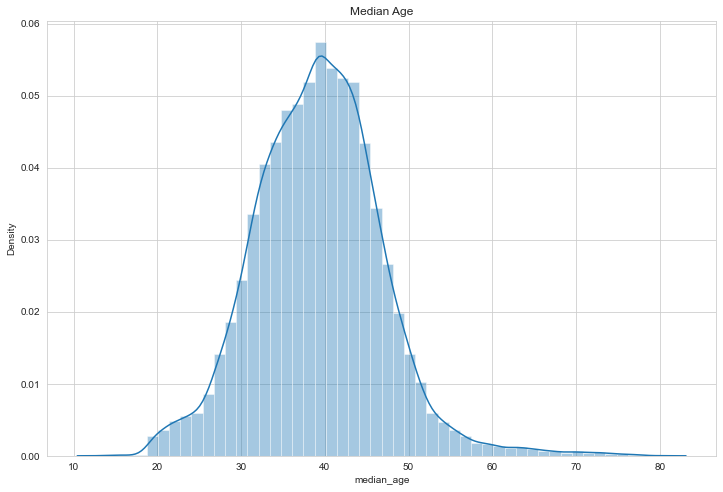

In [61]:
plt.figure(figsize=(12,8))
sns.distplot(train_df['median_age'])
plt.title('Median Age')
plt.show()
# Age of population is mostly between 20 and 60
# Majority are of age around 40
# Median age distribution has a gaussian distribution
# Some right skewness is noticed

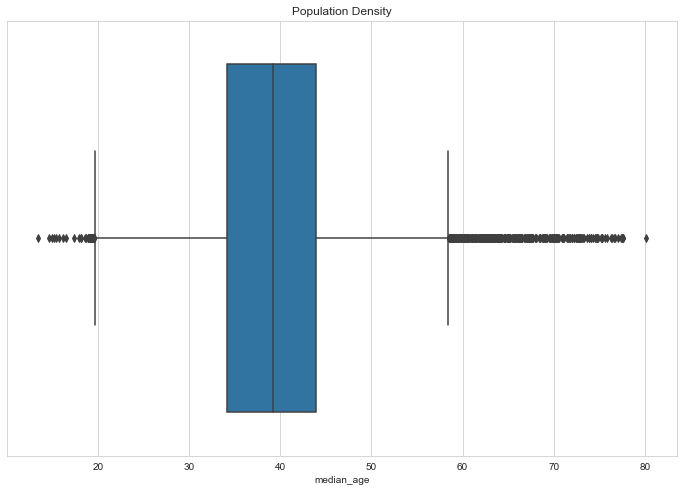

In [62]:
plt.figure(figsize=(12,8))
sns.boxplot(train_df['median_age'])
plt.title('Population Density')
plt.show() 

### 6. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

In [63]:
train_df['pop'].describe()

count    27321.000000
mean      4316.032685
std       2169.226173
min          0.000000
25%       2885.000000
50%       4042.000000
75%       5430.000000
max      53812.000000
Name: pop, dtype: float64

In [64]:
train_df['pop_bins'] = pd.cut(train_df['pop'], bins=5, labels= ['very low','low','medium','high','very high'])

In [65]:
train_df[['pop','pop_bins']]

pop  pop_bins
0       5230  very low
1       2633  very low
2       6881  very low
3       2700  very low
4       5637  very low
...      ...       ...
27316   1847  very low
27317   4155  very low
27318   2829  very low
27319  11542       low
27320   3726  very low

[27321 rows x 2 columns]

In [66]:
train_df['pop_bins'].value_counts()

very low     27058
low            246
medium           9
high             7
very high        1
Name: pop_bins, dtype: int64

### - Analyze the married, separated, and divorced population for these population brackets

In [67]:
train_df.groupby(by='pop_bins')[['married','separated','divorced']].count()

married  separated  divorced
pop_bins                               
very low     27058      27058     27058
low            246        246       246
medium           9          9         9
high             7          7         7
very high        1          1         1

In [68]:
train_df.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean", "median"])

married           separated            divorced          
               mean    median      mean    median      mean    median
pop_bins                                                             
very low   0.507548  0.524680  0.019126  0.013650  0.100504  0.096020
low        0.584894  0.593135  0.015833  0.011195  0.075348  0.070045
medium     0.655737  0.618710  0.005003  0.004120  0.065927  0.064890
high       0.503359  0.335660  0.008141  0.002500  0.039030  0.010320
very high  0.734740  0.734740  0.004050  0.004050  0.030360  0.030360

1. Very high population group has more married people and less percentage of separated and divorced couples
2. In very low population groups, there are more divorced people

### - Visualize using appropriate chart type

<Figure size 720x360 with 0 Axes>

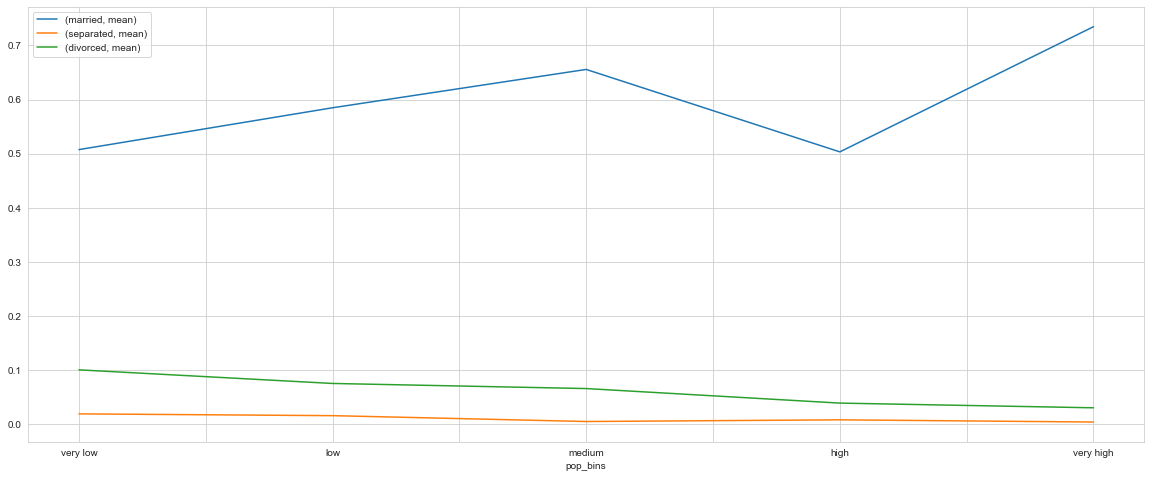

In [69]:
plt.figure(figsize=(10,5))
pop_bin_married= train_df.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
pop_bin_married.plot(figsize=(20,8))
plt.legend(loc='best')
plt.show()

## 7. Please detail your observations for rent as a percentage of income at an overall level, and for different states.

In [70]:
rent_state_mean = train_df.groupby(by='state')['rent_mean'].agg(["mean"])
rent_state_mean.head()

mean
state                  
Alabama      774.004927
Alaska      1185.763570
Arizona     1097.753511
Arkansas     720.918575
California  1471.133857

In [71]:
income_state_mean = train_df.groupby(by='state')['family_mean'].agg(["mean"])
income_state_mean.head()

mean
state                   
Alabama     67030.064213
Alaska      92136.545109
Arizona     73328.238798
Arkansas    64765.377850
California  87655.470820

In [72]:
rent_perc_of_income = rent_state_mean['mean']/income_state_mean['mean']
rent_perc_of_income.head(10)

state
Alabama                 0.011547
Alaska                  0.012870
Arizona                 0.014970
Arkansas                0.011131
California              0.016783
Colorado                0.013529
Connecticut             0.012637
Delaware                0.012929
District of Columbia    0.013198
Florida                 0.015772
Name: mean, dtype: float64

In [73]:
# overall level rent as a percentage of income
sum(train_df['rent_mean'])/sum(train_df['family_mean'])

0.013358170721473864

### 8. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

In [74]:
train_df.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_

In [75]:
cor = train_df[['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'median_age','pct_own', 'married','separated', 'divorced']].corr()

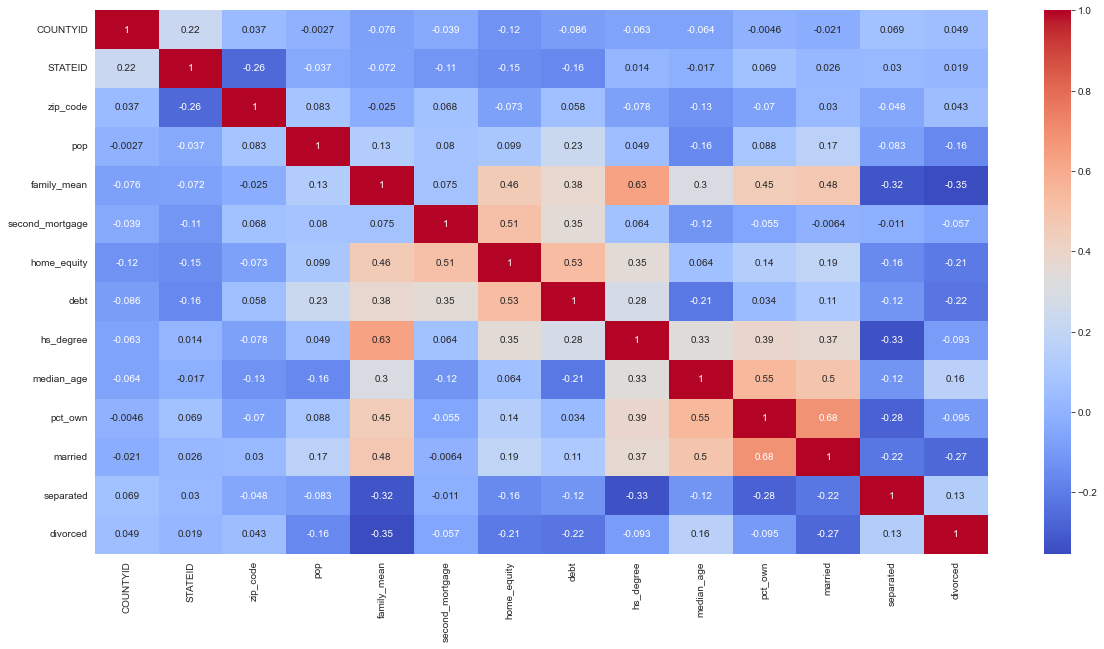

In [76]:
plt.figure(figsize=(20,10))
sns.heatmap(cor, annot= True, cmap= 'coolwarm')
plt.show()

1. High positive correlation is noticed between pop, male_pop and female_pop
2. High positive correlation is noticed between rent_mean,hi_mean, family_mean,hc_mean

## Data Pre-processing:

### 1. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 


### 2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data. 

- Following are the list of latent variables:

    - Highschool graduation rates

    - Median population age

    - Second mortgage statistics

    - Percent own

    - Bad debt expense

 

In [77]:
!pip install factor_analyzer

In [78]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [79]:
fa=FactorAnalyzer(n_factors=5)
fa.fit_transform(train_df.select_dtypes(exclude= ('object','category')))
fa.loadings_

array([[-0.08081665,  0.01916097, -0.0062884 , -0.20389232,  0.12049205],
       [-0.1125744 ,  0.02048033, -0.02935897, -0.07364192,  0.0422141 ],
       [-0.10363974,  0.0183814 ,  0.00614925, -0.19095215,  0.13446914],
       [-0.09226161,  0.04726175, -0.1142804 , -0.03411463, -0.13396659],
       [ 0.01594724,  0.01905415,  0.00479746,  0.02432027, -0.00763224],
       [ 0.0939763 , -0.09809458, -0.0511882 , -0.14474944, -0.14373732],
       [-0.00146651, -0.03706518,  0.12532356, -0.0087775 ,  0.13764273],
       [-0.04001106, -0.02081748,  0.03706429, -0.08768272,  0.06072513],
       [-0.00119755, -0.01533943, -0.00184913, -0.04111532,  0.02300202],
       [ 0.07855864,  0.95467074, -0.08498997, -0.00946287, -0.06147511],
       [ 0.07353484,  0.91587128, -0.10496905, -0.02956226, -0.06177046],
       [ 0.07979519,  0.94529195, -0.06055632,  0.01134807, -0.05872825],
       [ 0.76080124,  0.00788275, -0.03855232,  0.11609142, -0.13811881],
       [ 0.70894018,  0.00401349, -0.0

## Data Modeling :



### 3. Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. 

       Please refer deplotment_RE.xlsx. Column hc_mortgage_mean is predicted variable. This is the mean monthly mortgage and owner costs of specified geographical location.

       Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean. 

In [80]:
train_df.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_

In [81]:
train_df['type'].unique()
type_dict = {'type':{'City':1, 
                   'Urban':2, 
                   'Town':3, 
                   'CDP':4, 
                   'Village':5, 
                   'Borough':6}
          }
train_df.replace(type_dict,inplace=True)

In [82]:
train_df['type'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [83]:
test_df.replace(type_dict,inplace=True)

In [84]:
test_df['type'].unique()

array([4, 1, 6, 3, 5, 2], dtype=int64)

In [85]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'median_age','pct_own', 'married','separated', 'divorced']

In [86]:
X_train = train_df[feature_cols]
y_train = train_df['hc_mortgage_mean']

In [87]:
X_test = test_df[feature_cols]
y_test = test_df['hc_mortgage_mean']

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score

In [89]:
X_train.head()

COUNTYID  STATEID  zip_code  type   pop  family_mean  second_mortgage  \
0        53       36     13346     1  5230  67994.14790          0.02077   
1       141       18     46616     1  2633  50670.10337          0.02222   
2        63       18     46122     1  6881  95262.51431          0.00000   
3       127       72       927     2  2700  56401.68133          0.01086   
4       161       20     66502     1  5637  54053.42396          0.05426   

   home_equity     debt  hs_degree  median_age  pct_own  married  separated  \
0      0.08919  0.52963    0.89288   44.666665  0.79046  0.57851    0.01240   
1      0.04274  0.60855    0.90487   34.791665  0.52483  0.34886    0.01426   
2      0.09512  0.73484    0.94288   41.833330  0.85331  0.64745    0.01607   
3      0.01086  0.52714    0.91500   49.750000  0.65037  0.47257    0.02021   
4      0.05426  0.51938    1.00000   22.000000  0.13046  0.12356    0.00000   

   divorced  
0   0.08770  
1   0.09030  
2   0.10657  
3   0.10106  
4   0.03109

In [90]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### (a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

In [91]:
linereg = LinearRegression()
linereg.fit(X_train_scaled, y_train)

LinearRegression()

In [92]:
y_pred = linereg.predict(X_test_scaled)

In [93]:
print("Overall R2 score of linear regression model", r2_score(y_test,y_pred))
print("Overall RMSE of linear regression model", np.sqrt(mean_squared_error(y_test,y_pred)))

Overall R2 score of linear regression model 0.7348210754610929
Overall RMSE of linear regression model 323.1018894984635


###   b) Run another model at State level. There are 52 states in USA.

In [94]:
state = train_df['STATEID'].unique()
state
#Picking a few iDs 20,1,45,6

array([36, 18, 72, 20,  1, 48, 45,  6,  5, 24, 17, 19, 47, 32, 22,  8, 44,
       28, 34, 41,  4, 12, 55, 42, 37, 51, 26, 39, 40, 13, 16, 46, 27, 29,
       53, 56,  9, 54, 21, 25, 11, 15, 30,  2, 33, 49, 50, 31, 38, 35, 23,
       10], dtype=int64)

In [95]:
for i in [20,1,45]:
    print("State ID-",i)
    
    x_train_nation= train_df[train_df['COUNTYID']==i][feature_cols]
    y_train_nation= train_df[train_df['COUNTYID']==i]['hc_mortgage_mean']
    
    x_test_nation= train_df[train_df['COUNTYID']==i][feature_cols]
    y_test_nation= train_df[train_df['COUNTYID']==i]['hc_mortgage_mean']
    
    x_train_scaled_nation=scaler.fit_transform(x_train_nation)
    x_test_scaled_nation=scaler.fit_transform(x_test_nation)
    
    linereg.fit(x_train_scaled_nation,y_train_nation)
    y_pred_nation=linereg.predict(x_test_scaled_nation)
    
    print("Overall R2 score of linear regression model for state,",i,":-" ,r2_score(y_test_nation,y_pred_nation))
    print("Overall RMSE of linear regression model for state,",i,":-" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")

State ID- 20
Overall R2 score of linear regression model for state, 20 :- 0.8910120779820697
Overall RMSE of linear regression model for state, 20 :- 113.00713416809741


State ID- 1
Overall R2 score of linear regression model for state, 1 :- 0.8274886404580404
Overall RMSE of linear regression model for state, 1 :- 289.2619880833279


State ID- 45
Overall R2 score of linear regression model for state, 45 :- 0.7981343879955517
Overall RMSE of linear regression model for state, 45 :- 211.37536769637651




In [96]:
# To check the residuals
residuals = y_test-y_pred
residuals

0        281.969088
1        -69.935775
2        190.761969
3       -157.290627
4         -9.887017
            ...    
11704    -67.541646
11705    -41.578757
11706   -127.427569
11707   -330.820475
11708    217.760642
Name: hc_mortgage_mean, Length: 11709, dtype: float64

(array([6.000e+00, 3.000e+00, 2.900e+01, 7.670e+02, 7.823e+03, 2.716e+03,
        3.010e+02, 4.900e+01, 1.200e+01, 3.000e+00]),
 array([-2515.04284233, -1982.92661329, -1450.81038425,  -918.69415521,
         -386.57792617,   145.53830287,   677.65453191,  1209.77076095,
         1741.88698999,  2274.00321903,  2806.11944807]),
 <BarContainer object of 10 artists>)

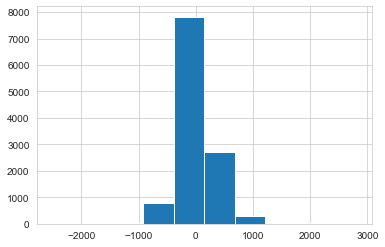

In [97]:
plt.hist(residuals) # Normal distribution of residuals

<AxesSubplot:xlabel='hc_mortgage_mean', ylabel='Density'>

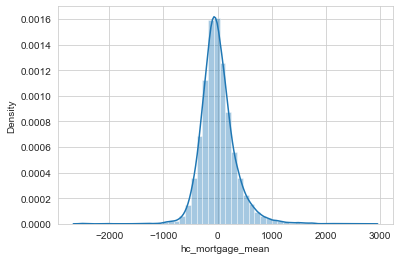

In [98]:
sns.distplot(residuals)

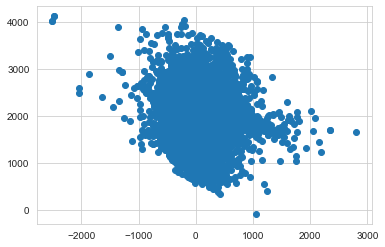

In [99]:
plt.scatter(residuals,y_pred) # Same variance and residuals does not have correlation with predictor
# Independance of residuals